##### [< Forrige](5%20-%20profittmaksimering.ipynb)     |     [Neste >](6%20-%20logikk-filtrering-betingelser.ipynb)

# 6 - Oppslag og pandas

Pandas er den pakken de  fleste bruker til å importere og behandle data. Det første du må gjøre for å bruke pandas er selvsagt å hente data. Dette kan gjøres på flere måter. Som vi husker fra forelesning 3 - matplotlib, gan vi hente inn  en csv-fil (kommadelt) slik:

#### Eksempel 1:

In [22]:
pd.read_csv('./data/schooling-gdp.csv')

,Land,Landkode,BNP_per_capita,Utdanning,Befolkning
0,Norway,NOR,73262.68000,11.65,4886000
1,Kuwait,KWT,67029.52300,6.39,2992000
2,Luxembourg,LUX,57882.80900,11.33,508000
3,Switzerland,CHE,55688.02000,12.92,7809000
4,United States,USA,49500.62900,13.24,309011008
...,...,...,...,...,...
101,Malawi,MWI,972.04572,5.01,14540000
102,Mozambique,MOZ,969.23077,2.03,23532000
103,Niger,NER,845.86932,1.95,16464000
104,Liberia,LBR,786.67023,4.35,3891000


En annen måte å gjøre det på er via en dataserver. På [https://titlon.uit.no/](https://titlon.uit.no/) ligger det børsinformasjon fra Oslo Børs. For å hente data fra Titlon gjør du følgende:

1. gå inn på [https://titlon.uit.no/](https://titlon.uit.no/) 
2. trykk på "Python"
3. logg inn (om du får en feilmelding etter innlogging følger du bare lenken over på nytt)
4. Kopierer teksten i tekstboksen
5. lim den inn under


#### Eksempel 1:

In [43]:
#Lim inn teksten fra Titlon her:
import pymysql
#you may substitute pymysql for pymssql if you prefer the MS SQL client
con = pymysql.connect(host='titlon.uit.no', 
		user="esi000@uit.no", 
		password="SQt8XhZMAVJbHEI!kv0Jb", 
		database='OSE')  

sql="SELECT * FROM equity WHERE Name='Equinor' ORDER BY `Date`"
df=pd.read_sql_query(sql, con)
df



,Date,SecurityId,CompanyId,Symbol,ISIN,Name,BestBidPrice,BestAskPrice,Open,High,...,lnDeltaOBX,NOWA_DayLnrate,bills_3month_Lnrate,Sector,IN_OSEBX,Equity,Debt,Earnings,debt_ratio,PE
0,2001-06-18,15578,1309,EQNR,NO0010096985,Equinor,69.00,69.50,72.00,72.00,...,0.000000,0.000327,0.000312,Energy,1,5.243500e+10,1.325910e+11,1.133500e+10,0.716607,13.0725
1,2001-06-19,15578,1309,EQNR,NO0010096985,Equinor,70.00,70.50,69.00,70.50,...,0.005838,0.000326,0.000310,Energy,1,5.243500e+10,1.325910e+11,1.133500e+10,0.716607,13.2619
2,2001-06-20,15578,1309,EQNR,NO0010096985,Equinor,70.50,71.00,70.00,71.00,...,-0.000634,0.000330,0.000312,Energy,1,5.243500e+10,1.325910e+11,1.133500e+10,0.716607,13.4514
3,2001-06-21,15578,1309,EQNR,NO0010096985,Equinor,70.00,71.00,71.00,71.00,...,-0.008633,0.000331,0.000308,Energy,1,5.243500e+10,1.325910e+11,1.133500e+10,0.716607,13.2619
4,2001-06-22,15578,1309,EQNR,NO0010096985,Equinor,69.50,70.00,70.00,70.50,...,0.006505,0.000335,0.000307,Energy,1,5.243500e+10,1.325910e+11,1.133500e+10,0.716607,13.1672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,2020-11-23,15578,1309,EQNR,NO0010096985,Equinor,141.25,141.30,138.65,141.50,...,0.010065,0.000000,0.000004,Energy,1,3.995300e+10,5.662000e+10,1.495750e+10,0.586292,20.2797
4881,2020-11-24,15578,1309,EQNR,NO0010096985,Equinor,148.55,148.65,143.20,149.20,...,0.024738,0.000000,0.000004,Energy,1,3.995300e+10,5.662000e+10,1.495750e+10,0.586292,21.3421
4882,2020-11-25,15578,1309,EQNR,NO0010096985,Equinor,145.75,145.85,149.35,150.35,...,-0.005258,0.000000,0.000004,Energy,1,3.995300e+10,5.662000e+10,1.495750e+10,0.586292,20.9257
4883,2020-11-26,15578,1309,EQNR,NO0010096985,Equinor,143.75,143.80,144.30,145.05,...,0.000840,0.000000,0.000004,Energy,1,3.995300e+10,5.662000e+10,1.495750e+10,0.586292,20.6386


Koden leser inn dataene til en pandas `dataframe`, eller dataramme. Denne er kalt `df` her. Om vi ser nærmere på koden, så ser vi at den gjør følgende:

1. lager et objekt `con` som representerer forbindelsen med databasen. Denne lages ved å bruke `connect()`-funksjonen til `pymysql`, som er en pakke for å hente data fra MySQL-databaser. Input er navn på server, brukernavn, passord (automatisk generert) og navn på database. 

2. lager en streng `sql` med kommandoen til databasen, i SQL-språk
3. lager en `dataframe` som kalles `df` ved å bruke  `read_sql_query`-funksjonen i pandas

Før vi fortsetter er det kanskje greit å forklare hva SQL er. SQL er et språk laget spesifikt for å hente ut data fra dataabaser. Nesten alle databaser er SQL-basert. Syntaksen kan virke litt knotete, men kan være lurt å lære seg dette språket. En god SQL-spørring kan spare deg for mye programmering senere. Dette er imidlertid ikke et kurs i SQL, så vi går ikke nærmere inn på denne syntaksen her. 

I tabellen vi henter, over, mangler endel variabler fordi det ikke er plass. For å se navnet på alle variablene kan du bruke `keys()`-funksjonen til datarammen:

In [27]:
df.keys()

Index(['Date', 'SecurityId', 'CompanyId', 'Symbol', 'ISIN', 'Name',
       'BestBidPrice', 'BestAskPrice', 'Open', 'High', 'Low', 'Close',
       'OfficialNumberOfTrades', 'OfficialVolume', 'UnofficialNumberOfTrades',
       'UnofficialVolume', 'VolumeWeightedAveragePrice', 'Price',
       'AdjustedPrice', 'Dividends', 'LDividends', 'CorpAdj', 'DividendAdj',
       'Currency', 'Description', 'CountryCode', 'SumAnnualDividends',
       'NumberOfShares', 'CompanyOwnedShares', 'OutstandingShares', 'Exchange',
       'NOKPerForex', 'mktcap', 'OSEBXmktshare_prevmnth',
       'OSEBXAlpha_prevmnth', 'OSEBXBeta_prevmnth', 'SMB', 'HML', 'LIQ', 'MOM',
       'DividendPriceRatio', 'lnDeltaP', 'lnDeltaOSEBX', 'lnDeltaOBX',
       'NOWA_DayLnrate', 'bills_3month_Lnrate', 'Sector', 'IN_OSEBX', 'Equity',
       'Debt', 'Earnings', 'debt_ratio', 'PE'],
      dtype='object')

En dataframe ligner litt på en oppslagsliste. Du henter frem variabelen du vil bruke ved hjelp av hakeparenteser. I Titlondatabasen er avkastningen `lnDeltaP`, så la oss ta en kikk på på den:

In [28]:
df['lnDeltaP']

0       0.000000
1       0.014389
2       0.014185
3      -0.014185
4      -0.007168
          ...   
4880    0.029456
4881    0.051063
4882   -0.019702
4883   -0.013817
4884    0.021336
Name: lnDeltaP, Length: 4885, dtype: float64

Det viser seg at i aksjemarkedet, så har aksjene en tendens til å bevege seg i samme retning. Går børsen først ned, så vil det gjelde de aller fleste aksjene på børsen. Gjennomsnittetlig avkastning for alle børsens aksjer måles av *børsindeksen*. I Titlon er børsindeksen lagt inn som en variabel for hvert selskap under navnet `lnDeltaOSEBX`. La oss derfor undersøke om det stemmer at det er en nær sammenheng mellom Equinors kurs og børsindeksen, ved hjelp av `matplotlib`:

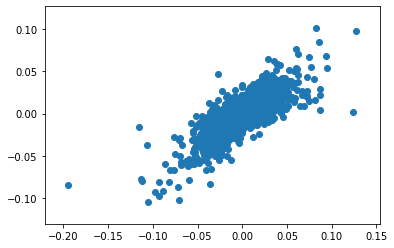

In [29]:
from matplotlib import pyplot as plt
plt.scatter(df['lnDeltaP'],df['lnDeltaOSEBX'])

Du kan finne informasjon om andre aksjer enn Equinor om du vil. Koden under kjører en SQL-spørring som henter navnene på alle selskap i databasen etter 2015. Om du vil hente ut et annet 

In [71]:
sql="SELECT distinct Name,ISIN,SecurityId,CompanyId FROM equity WHERE Year(Date)>2015 ORDER BY `Name`"
companies=pd.read_sql_query(sql, con)
list(companies.values)

[array(['2020 Bulkers', 'BMG9156K1018', 1304857, 12720], dtype=object),
 array(['5th Planet Games', 'DK0060945467', 1301972, 12440], dtype=object),
 array(['ABG Sundal Collier Holding', 'NO0003021909', 6085, 2017],
       dtype=object),
 array(['Adevinta', 'NO0010844038', 1304655, 12701], dtype=object),
 array(['Adevinta ser. A', 'NO0010843998', 1304652, 12701], dtype=object),
 array(['Aega', 'NO0010626559', 1251504, 11273], dtype=object),
 array(['AF Gruppen', 'NO0003078107', 27028, 6051], dtype=object),
 array(['African Petroleum Corporation', 'AU000000AOQ0', 1301079, 12300],
       dtype=object),
 array(['Agasti Holding', 'NO0003108102', 49006, 6806], dtype=object),
 array(['Akastor', 'NO0010215684', 56655, 7765], dtype=object),
 array(['Aker', 'NO0010234552', 57522, 6047], dtype=object),
 array(['Aker BP', 'NO0010345853', 66985, 8376], dtype=object),
 array(['Aker Philadelphia Shipyard', 'NO0010395577', 68945, 8462],
       dtype=object),
 array(['Aker Solutions', 'NO0010716582', 1

In [73]:
sql="SELECT distinct ISIN,date, lnDeltaOSEBX,lnDeltaP FROM equity WHERE Name='Equinor' or Name='Adevinta' or Name='SalMar' ORDER BY `Date`"
df=pd.read_sql_query(sql, con)

In [75]:
df=df.sort_values(['ISIN','date'])
panel=df.groupby('ISIN')
panel

In [208]:
import eurostat
toc = eurostat.get_toc_df()
gdp_title=toc[['GDP' in i for i in toc['title']]]
gdp_title

,title,code,type,last update of data,last table structure change,data start,data end
59,"GDP and main components (output, expenditure a...",nama_10_gdp,dataset,23.09.2021,08.02.2021,1975,2020
60,Main GDP aggregates,ei_namq_10_ma,folder,,,,
61,"GDP and main components (output, expenditure a...",namq_10_gdp,dataset,23.09.2021,29.07.2021,1975Q1,2021Q2
64,Basic breakdowns of main GDP aggregates and em...,ei_namq_10_bbr,folder,,,,
194,Gross domestic product (GDP) at current market...,nama_10r_2gdp,dataset,14.07.2021,16.03.2021,2000,2019
...,...,...,...,...,...,...,...
9933,Imports of goods and services in % of GDP,tet00004,table,23.09.2021,23.09.2021,2009,2020
9936,Inward FDI stocks in % of GDP,tec00105,table,08.02.2021,08.02.2021,2013,2017
9937,Outward FDI stocks in % of GDP,tec00106,table,08.02.2021,08.02.2021,2013,2017
10133,Volume of freight transport relative to GDP,tran_hv_frtra,dataset,25.03.2021,23.03.2021,2005,2019


In [114]:
gdp_code=gdp_title.iloc[0]['code']
gdp_code

'tec00114'

In [113]:
gdp_title.iloc[0]['code']

'tec00114'

array([[1.0, 1.0357142857142858, 1.0714285714285714, 1.0714285714285714,
        1.0357142857142858, 1.0714285714285714, 1.1071428571428572,
        1.0714285714285714, 1.0714285714285714, 1.0714285714285714,
        1.1071428571428572, 1.1071428571428572],
       [1.0, 1.0, 1.0078125, 1.0390625, 1.0390625, 1.03125, 1.0234375,
        1.015625, 0.9921875, 1.0, 0.984375, 0.96875],
       [1.0, 1.0, 1.0, 1.0, 1.0333333333333334, 1.0, 1.0333333333333334,
        1.0333333333333334, 1.0333333333333334, 1.0666666666666667,
        1.0666666666666667, 1.1],
       [1.0, 1.0254237288135593, 1.0084745762711864, 1.0254237288135593,
        1.0254237288135593, 1.0254237288135593, 1.0254237288135593,
        1.0169491525423728, 1.0, 1.0, 1.0, 0.9915254237288136],
       [1.0, 1.0, 1.0454545454545454, 1.0681818181818181,
        1.0454545454545454, 1.0681818181818181, 1.0909090909090908,
        1.1136363636363635, 1.1363636363636365, 1.1590909090909092,
        1.2045454545454546, 1.25],
       [

In [163]:
gdp_data

,na_item,ppp_cat,unit,geo\time,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,CV_VI_HAB,GDP,PC,EA18,43.3,41.4,40.8,39.5,39.5,39.3,...,41.1,40.5,40.7,41.9,43.1,43.0,42.0,41.8,41.6,44.3
1,CV_VI_HAB,GDP,PC,EA19,46.1,44.1,43.3,41.6,41.5,41.0,...,41.8,40.9,40.9,42.0,43.3,43.1,42.0,41.7,41.4,43.9
2,CV_VI_HAB,GDP,PC,EU27_2007,49.9,47.9,46.9,45.2,44.7,44.1,...,42.1,41.1,41.0,41.7,42.7,42.4,41.2,40.7,40.0,41.9
3,CV_VI_HAB,GDP,PC,EU27_2020,51.9,49.8,48.7,46.8,46.3,45.7,...,43.5,42.5,42.4,43.2,44.2,43.8,42.5,41.9,41.2,43.1
4,CV_VI_HAB,GDP,PC,EU28,50.7,48.7,47.6,45.8,45.3,44.7,...,42.6,41.6,41.6,42.3,43.3,42.9,41.6,41.1,40.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,VI_PPS_EU27_2020_HAB,GDP,PC,SI,81.0,82.0,83.0,85.0,88.0,89.0,...,84.0,83.0,83.0,83.0,83.0,84.0,86.0,87.0,89.0,89.0
89,VI_PPS_EU27_2020_HAB,GDP,PC,SK,51.0,53.0,55.0,57.0,59.0,62.0,...,76.0,77.0,78.0,78.0,78.0,73.0,71.0,71.0,70.0,71.0
90,VI_PPS_EU27_2020_HAB,GDP,PC,TR,43.0,39.0,38.0,39.0,42.0,44.0,...,57.0,59.0,62.0,65.0,68.0,66.0,66.0,63.0,59.0,64.0
91,VI_PPS_EU27_2020_HAB,GDP,PC,UK,119.0,119.0,120.0,122.0,123.0,121.0,...,108.0,110.0,111.0,111.0,111.0,109.0,107.0,106.0,104.0,102.0


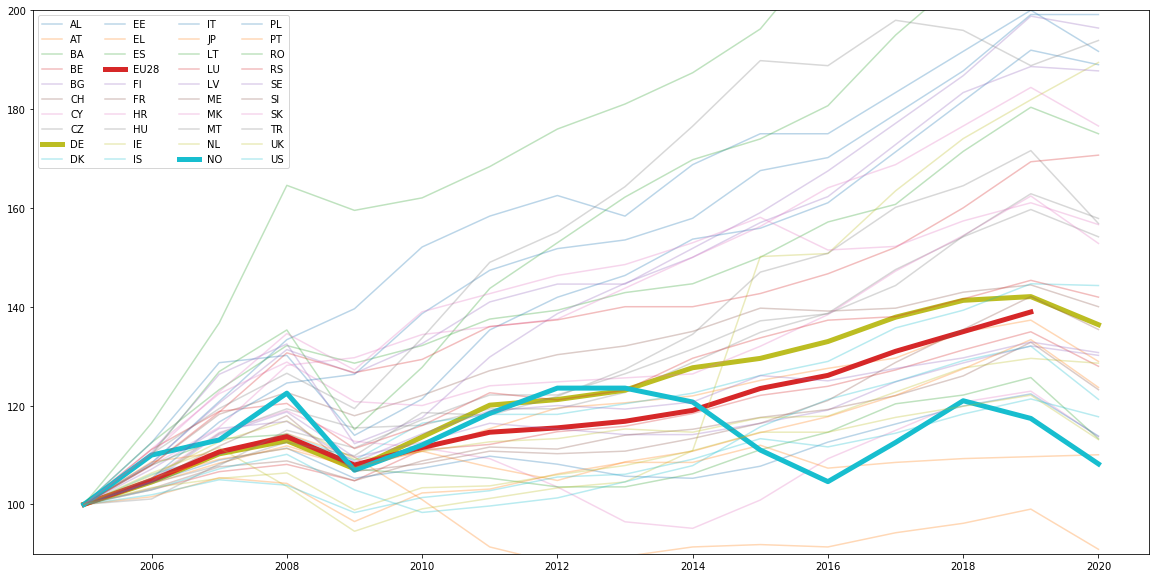

In [207]:
from matplotlib import pyplot as plt
import eurostat
import numpy as np
gdp_data = eurostat.get_data_df('sdg_10_10')
gdp_data = gdp_data[gdp_data['na_item']=='EXP_PPS_EU27_2020_HAB']
gdp_data = gdp_data[~gdp_data['geo\\time'].isin(['EA18','EA19','EU27_2007','EU27_2020','EA18','EA18'])]
years=gdp_data.keys()[9:]
country_codes=list(np.array(gdp_data)[:,3])
gdp_np=np.array(gdp_data)[:,9:]
gdp_np=100*gdp_np/gdp_np[:,0:1]
plt.figure(figsize=(20,10))
p=plt.plot(years,gdp_np.T,alpha=0.3)
p[country_codes.index('DE')].set_linewidth(5)
p[country_codes.index('NO')].set_linewidth(5)
p[country_codes.index('EU28')].set_linewidth(5)
p[country_codes.index('DE')].set_alpha(1)
p[country_codes.index('NO')].set_alpha(1)
p[country_codes.index('EU28')].set_alpha(1)
plt.ylim([90, 200])
plt.legend(p,country_codes,loc='upper left',ncol=4)

In [170]:
country_codes=list(np.array(gdp_data)[:,3])
country_codes.index('DE')

13

In [191]:
np.unique(gdp_data['na_item'])


array(['CV_VI_HAB', 'EXP_PPS_EU27_2020_HAB', 'VI_PPS_EU27_2020_HAB'],
      dtype=object)

In [196]:
gdp_data = eurostat.get_data_df('sdg_10_10')
gdp_data[gdp_data['na_item']=='EXP_PPS_EU27_2020_HAB']

,na_item,ppp_cat,unit,geo\time,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
5,EXP_PPS_EU27_2020_HAB,GDP,PC,AL,3200.0,3600.0,3800.0,4100.0,4400.0,4800.0,...,7600.0,7800.0,7600.0,8100.0,8400.0,8400.0,8800.0,9200.0,9600.0,9200.0
6,EXP_PPS_EU27_2020_HAB,GDP,PC,AT,24400.0,24600.0,25600.0,26400.0,27600.0,28700.0,...,33100.0,34300.0,34600.0,35000.0,35900.0,36600.0,37200.0,38700.0,39400.0,37000.0
7,EXP_PPS_EU27_2020_HAB,GDP,PC,BA,NaN,NaN,NaN,NaN,NaN,5600.0,...,7700.0,7800.0,8000.0,8100.0,8400.0,8800.0,9000.0,9600.0,10100.0,9800.0
8,EXP_PPS_EU27_2020_HAB,GDP,PC,BE,23100.0,23800.0,24800.0,25400.0,26200.0,27200.0,...,30500.0,31200.0,31500.0,32200.0,33200.0,33700.0,34600.0,35700.0,36700.0,34800.0
9,EXP_PPS_EU27_2020_HAB,GDP,PC,BG,5300.0,5800.0,6400.0,6900.0,7500.0,8300.0,...,11700.0,12000.0,12000.0,12600.0,13200.0,13900.0,14700.0,15500.0,16500.0,16300.0
10,EXP_PPS_EU27_2020_HAB,GDP,PC,CH,30300.0,31100.0,31600.0,31600.0,32700.0,34000.0,...,43200.0,44300.0,44900.0,45900.0,47500.0,47300.0,47500.0,48600.0,49100.0,47600.0
11,EXP_PPS_EU27_2020_HAB,GDP,PC,CY,17700.0,18900.0,19300.0,19900.0,21200.0,22700.0,...,24800.0,23500.0,21900.0,21600.0,22900.0,24800.0,26100.0,27400.0,27900.0,25800.0
12,EXP_PPS_EU27_2020_HAB,GDP,PC,CZ,13500.0,14600.0,15000.0,16000.0,17100.0,18100.0,...,21600.0,21600.0,22200.0,23300.0,24400.0,25100.0,26700.0,27900.0,28900.0,27900.0
13,EXP_PPS_EU27_2020_HAB,GDP,PC,DE,22800.0,23700.0,24200.0,24900.0,25900.0,26400.0,...,31700.0,32000.0,32500.0,33700.0,34200.0,35100.0,36400.0,37300.0,37500.0,36000.0
14,EXP_PPS_EU27_2020_HAB,GDP,PC,DK,23800.0,24400.0,25100.0,25300.0,26900.0,28000.0,...,33100.0,33100.0,33700.0,34300.0,35300.0,36100.0,38000.0,39000.0,40500.0,40400.0


## Oppgaver:

1. Hent ut to andre selskap fra titlon, og plott dem med `scatter()`-funksjonen for å se om det er en sammenheng mellom avkastningene.  

##### [< Forrige](5%20-%20profittmaksimering.ipynb)     |     [Neste >](6%20-%20logikk-filtrering-betingelser.ipynb)